## Wall Crawling

### We will play withj data to analyze the performance of wall crawling algorithm

## Project: Search and Sample Return
### Writeup Template: You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.

---


**The goals / steps of this project are the following:**  

**Training / Calibration**  

* Download the simulator and take data in "Training Mode"
* Test out the functions in the Jupyter Notebook provided
* Add functions to detect obstacles and samples of interest (golden rocks)
* Fill in the `process_image()` function with the appropriate image processing steps (perspective transform, color threshold etc.) to get from raw images to a map.  The `output_image` you create in this step should demonstrate that your mapping pipeline works.
* Use `moviepy` to process the images in your saved dataset with the `process_image()` function.  Include the video you produce as part of your submission.

**Autonomous Navigation / Mapping**

* Fill in the `perception_step()` function within the `perception.py` script with the appropriate image processing functions to create a map and update `Rover()` data (similar to what you did with `process_image()` in the notebook). 
* Fill in the `decision_step()` function within the `decision.py` script with conditional statements that take into consideration the outputs of the `perception_step()` in deciding how to issue throttle, brake and steering commands. 
* Iterate on your perception and decision function until your rover does a reasonable (need to define metric) job of navigating and mapping.  

[//]: # (Image References)

[image1]: ./misc/rover_image.jpg
[image2]: ../calibration_images\\example_grid1.jpg
[image3]: "../calibration_images/example_rock1.jpg" 

## [Rubric](https://review.udacity.com/#!/rubrics/916/view) Points
### Here I will consider the rubric points individually and describe how I addressed each point in my implementation.  

---
### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one.  You can submit your writeup as markdown or pdf.  

You're reading it!

### Notebook Analysis
#### 1. Run the functions provided in the notebook on test images (first with the test data provided, next on data you have recorded). Add/modify functions to allow for color selection of obstacles and rock samples.
Here is an example of how to include an image in your writeup.

![alt text][image1]

#### 1. Populate the `process_image()` function with the appropriate analysis steps to map pixels identifying navigable terrain, obstacles and rock samples into a worldmap.  Run `process_image()` on your test data using the `moviepy` functions provided to create video output of your result. 
And another! 

![alt text][image2]
### Autonomous Navigation and Mapping

#### 1. Fill in the `perception_step()` (at the bottom of the `perception.py` script) and `decision_step()` (in `decision.py`) functions in the autonomous mapping scripts and an explanation is provided in the writeup of how and why these functions were modified as they were.


#### 2. Launching in autonomous mode your rover can navigate and map autonomously.  Explain your results and how you might improve them in your writeup.  

**Note: running the simulator with different choices of resolution and graphics quality may produce different results, particularly on different machines!  Make a note of your simulator settings (resolution and graphics quality set on launch) and frames per second (FPS output to terminal by `drive_rover.py`) in your writeup when you submit the project so your reviewer can reproduce your results.**

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further.  



![alt text][image3]




In [113]:
ls "../calibration_images/"

 Volume in drive C has no label.
 Volume Serial Number is 9869-E7A3

 Directory of C:\Users\RKTHINKPAD\Documents\Repos\Python Projects\Robotics\calibration_images

01/18/2018  09:59 AM    <DIR>          .
01/18/2018  09:59 AM    <DIR>          ..
01/18/2018  09:59 AM             6,148 .DS_Store
01/18/2018  09:59 AM             7,370 example_grid1.jpg
01/18/2018  09:59 AM             7,333 example_grid2.jpg
01/18/2018  09:59 AM             5,136 example_rock1.jpg
01/18/2018  09:59 AM             7,021 example_rock2.jpg
01/18/2018  09:59 AM               945 map_bw.png
               6 File(s)         33,953 bytes
               2 Dir(s)  131,106,930,688 bytes free


import cv2 # OpenCV for perspective transform
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc # For saving images as needed
import glob  # For reading in a list of images from a folder

5355


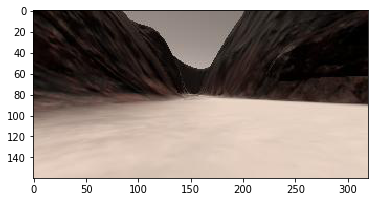

In [10]:
path = '../test_dataset6/IMG/*'
img_list = glob.glob(path)
print(len(img_list))
# Grab a random image and display it
idx = 300
image = mpimg.imread(img_list[idx])
plt.imshow(image)

In [3]:
def perspect_transform(img, src, dst):
           
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))# keep same size as input image
    
    return warped

def color_thresh_cv2(rgb_img, rgb_thresh_low=[0,0,0], rgb_thresh_high=[50,50,50]):
    bgr_img = np.flip(rgb_img, axis=2) 
    color_select = cv2.inRange(bgr_img, rgb_thresh_low, rgb_thresh_high)
    return color_select


def rover_coords(binary_img):
    # Identify nonzero pixels
    ypos, xpos = binary_img.nonzero()
    # Calculate pixel positions with reference to the rover position being at the 
    # center bottom of the image.  
    x_pixel = np.absolute(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel = -(xpos - binary_img.shape[0]).astype(np.float)
    return x_pixel, y_pixel

# Define a function to convert to radial coords in rover space
def to_polar_coords(x_pixel, y_pixel):
    # Convert (x_pixel, y_pixel) to (distance, angle) 
    # in polar coordinates in rover space
    # Calculate distance to each pixel
    dist = np.sqrt(x_pixel**2 + y_pixel**2)
    # Calculate angle away from vertical for each pixel
    angles = np.arctan2(y_pixel, x_pixel)
    return dist, angles

In [4]:
#    def distance_thresh_polar_coords(dist, angles, threshdist):
#    indices = list(filter(lambda idx: dist[idx] > threshdist, range(len(dist))))
#    dist_t = [dist[idx] for idx in indices]
#    angle_t = [angles[idx] for idx in indices]
#    return dist_t, angle_t

def distance_thresh_polar_coords(dist, angles, dist_thresh, angle_thresh):
    indices_set = set()
    # indices_d = list(filter(lambda idx: dist[idx] > dist_thresh, range(len(dist))))
    indices_t = list(filter(lambda idx: (angles[idx] < angle_thresh*np.pi/180) and (dist[idx] > dist_thresh), range(len(angles))))
    # indices_t.extend(indices_d)
    for idx in indices_t:
        indices_set.add(idx)

    # dist_t = [dist[idx] for idx in indices_set]
    dist_t = dist
    angle_t = [angles[idx] for idx in indices_set]
    if len(angle_t) != 0:
        return np.array(dist_t), np.array(angle_t)
    else:
        return np.array(dist_t), np.array([None])

In [5]:
def is_obstacle_ahead(dist, angles, thresh, angle_thresh):
    angle_bins = np.linspace(-15,15,61)
    new_dist = list(dist)
    new_angles = list(angles)

    indices = np.digitize(new_angles, angle_bins)
    
    dict_of_lists = {}
    for ang in angle_bins:
        dict_of_lists[ang] = list()

    count = 0
    for idx in indices:
        if idx > 0 and idx <= len(angle_bins):
            dict_of_lists[angle_bins[idx-1]].append(new_dist[count])
        count += 1
    
    for key, value in dict_of_lists.items():
        if len(value) == 0:
            dict_of_lists[key] = [-1]
        
    list_of_mins = []
    list_of_cont_pairs = list()
    in_ones = False
    for key, value in dict_of_lists.items():
        tmplist = list(filter(lambda elm: elm < (thresh + 20), value))
        if len(tmplist) != 0:
            if np.amax(tmplist) > thresh:
                list_of_mins.append(1)
                if not in_ones:
                    list_of_cont_pairs.append([])
                    list_of_cont_pairs[-1].append([key])
                    list_of_cont_pairs[-1][0].append(key)
                    in_ones = True
                else:
                    list_of_cont_pairs[-1][0].pop()
                    list_of_cont_pairs[-1][0].append(key)
            else:
                list_of_mins.append(0)
                if in_ones:
                    in_ones = False
                    
        else:
            list_of_mins.append(0)
            in_ones = False
    
    list_of_cont_pairs_filtered = list(filter(lambda elm:(elm[0][1] - elm[0][0]) > angle_thresh, list_of_cont_pairs))
    
    dist1 = []
    angle1 = []
        
    for elm in list_of_cont_pairs_filtered:
        for ang in np.linspace(elm[0][0], elm[0][1], (elm[0][1] - elm[0][0])//0.5 + 1):
            dist1.append(15)
            angle1.append(ang)
        
            
    print(np.mean(list_of_mins))
    return (True if np.mean(list_of_mins) > 0.3 else False, True if len(list_of_cont_pairs_filtered) > 0 else False, dist1, angle1, list_of_cont_pairs_filtered)

In [6]:
def get_steer_angle(list_angles_pairs, max_allowed_angle):
    list_angles_pairs.sort(reverse = True, key=lambda x:x[0][1])
    for angle_pair in list_angles_pairs:
        print(angle_pair)
        if max_allowed_angle > angle_pair[0][1]:
            return angle_pair[0][1]
        elif max_allowed_angle <= angle_pair[0][1] and max_allowed_angle >= angle_pair[0][0]:
            return max_allowed_angle
        else:
            pass
    return None

In [40]:
def sample_detected_ahead(dist, angles, distance_range, angle_range):
    dists_sliced = list()
    angles_sliced = list()
    dists_sliced, angles_sliced = slice_polar_coords(dist, angles, distance_range, angle_range)
    if dists_sliced == None:
        return False, -1
    else:
        dist_mass, angle_mass = center_of_mass_polar(dists_sliced, angles_sliced)
        return True, dist_mass

def center_of_mass_polar(dist, angles):
    float_dist = np.array([np.float(x) for x in dist])
    angles_cosine = np.array([np.cos(x*np.pi/180) for x in angles])
    angles_sine = np.array([np.sin(x*np.pi/180) for x in angles])
                              
    x_mass = np.mean(np.multiply(float_dist, angles_cosine))
    y_mass = np.mean(np.multiply(float_dist, angles_sine))
    dist_mass = -1
    angle_mass = 0
    dist_mass, angle_mass = to_polar_coords(x_mass, y_mass)

    return dist_mass, angle_mass*180/np.pi

def slice_polar_coords(dist, angles, dist_range, angle_range):
    indices_slice = list(filter(lambda idx: angles[idx] <= angle_range[1] and \
                                            angles[idx] >= angle_range[0] and \
                                            dist[idx] >= dist_range[0] and \
                                            dist[idx] <= dist_range[1],range(len(angles))))
    dist1 = list()
    angles1 = list()

    dist1 = [dist[idx] for idx in indices_slice]
    angles1 = [angles[idx] for idx in indices_slice]

    if len(dist1) == 0:
        return None, None
    else:
        return dist1, angles1


In [7]:
def process_image(img):
    # 1) Define source and destination points for perspective transform
    dst_size = 5
    bottom_offset = 6
    source = np.float32([[14, 140], [301, 140], [200, 96], [118, 96]])
    destination = np.float32([[img.shape[1] / 2 - dst_size, img.shape[0] - bottom_offset],
                              [img.shape[1] / 2 + dst_size, img.shape[0] - bottom_offset],
                              [img.shape[1] / 2 + dst_size, img.shape[0] - 2 * dst_size - bottom_offset],
                              [img.shape[1] / 2 - dst_size, img.shape[0] - 2 * dst_size - bottom_offset],
                              ])
    # 2) Apply perspective transform
    warped = perspect_transform(img, source, destination)
    # 3) Apply color threshold to identify navigable terrain/obstacles/rock samples
    terrain = color_thresh_cv2(warped, np.array([100, 100, 100]), np.array([255, 255, 255]))
    rocks = color_thresh_cv2(warped, np.array([0, 80, 80]), np.array([60, 255, 255]))
    obstacles = np.ones((img.shape[0], img.shape[1]))
    obstacles[np.logical_or(rocks, terrain)] = 0
    shape = terrain.shape
    color_coded_image = np.zeros((shape[0], shape[1], 3), dtype=np.uint8) 
    color_coded_image[:,:,0] = obstacles*255
    color_coded_image[:,:,1] = rocks
    color_coded_image[:,:,2] = terrain
        
    return color_coded_image


5355
0.9016393442622951
[[[-15.0, -2.0]], [[1.5, 13.0]]]
[[1.5, 13.0]]
steer angle:  5


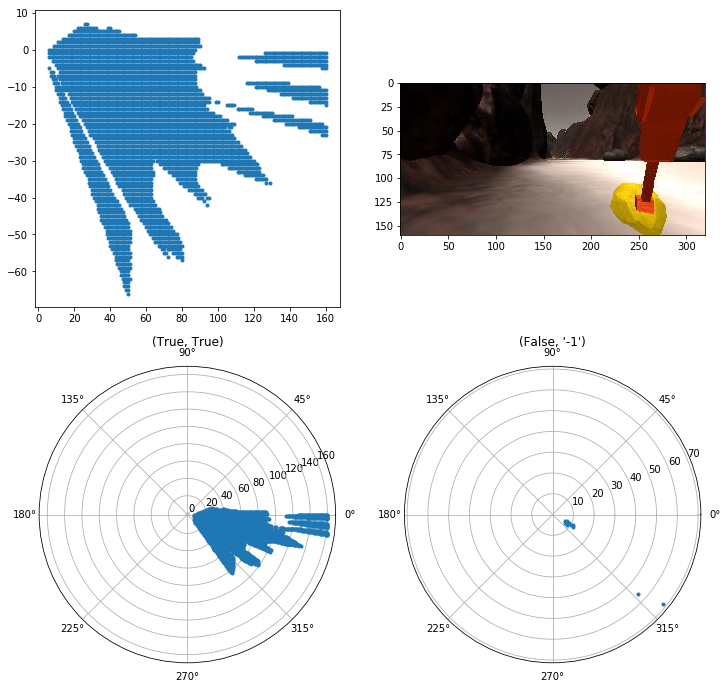

In [107]:
import moviepy.editor as mpy

new_img_list = []
plt.figure(figsize=(12,12));
print(len(img_list))
count = 1
dist = []
angles = []
dists_samp = []
angles_samp = []
det_samp = []
com_samp = []

for img_file in img_list_sliced:
    img = mpimg.imread(img_file)
    color_coded_image = process_image(img)
    #print(img.shape, "\n", color_coded_image.shape)
    if (count%50 == 0):
        print(count) 
    else:
        pass

    count += 1
    
    new_img_list.append(np.concatenate((img, color_coded_image), axis=0))
    xter, yter = rover_coords(color_coded_image[:,:,2])
    dist, angles = to_polar_coords(xter, yter)
    dist_t, angles_t = distance_thresh_polar_coords(dist, angles, 10, 5)
    
    # extract sample pixel into rover coords and convert to polar format
    xsamp, ysamp = rover_coords(color_coded_image[:,:,1])
    dists_samp, angles_samp = to_polar_coords(xsamp, ysamp)

plt.subplot(221)
plt.plot(xter, yter, '.')
plt.subplot(222)
plt.imshow(img)

plt.subplot(223, projection='polar')
plt.plot(angles, dist, '.')
log1, log2, dst1, ang1, angle_pairs_list = is_obstacle_ahead(dist, angles*180/np.pi, 15, 10)
plt.title((log1, log2))
#plt.subplot(224, projection='polar')
#plt.plot(np.array(ang1)*np.pi/180, dst1, '.')

# detect is sample ahead
det_samp, com_samp = sample_detected_ahead(dists_samp, angles_samp, [0, 50], [0, 30])
plt.subplot(224, projection='polar')
plt.plot(np.array(angles_samp), np.array(dists_samp), '.')
plt.title((det_samp, str(com_samp)))

print(angle_pairs_list)
print("steer angle: ", get_steer_angle(angle_pairs_list, 5))




In [106]:
img_list_sliced = img_list[3550:3575]

In [9]:
output = '../test_dataset2/test_mapping.mp4'
clip_list = mpy.ImageSequenceClip(new_img_list, fps=25) # Note: output video will be sped up because 
                                          # recording rate in simulator is fps=25
    
clip_list.write_videofile(output, audio=False)   

[MoviePy] >>>> Building video ../test_dataset2/test_mapping.mp4
[MoviePy] Writing video ../test_dataset2/test_mapping.mp4


100%|███████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 246.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../test_dataset2/test_mapping.mp4 

